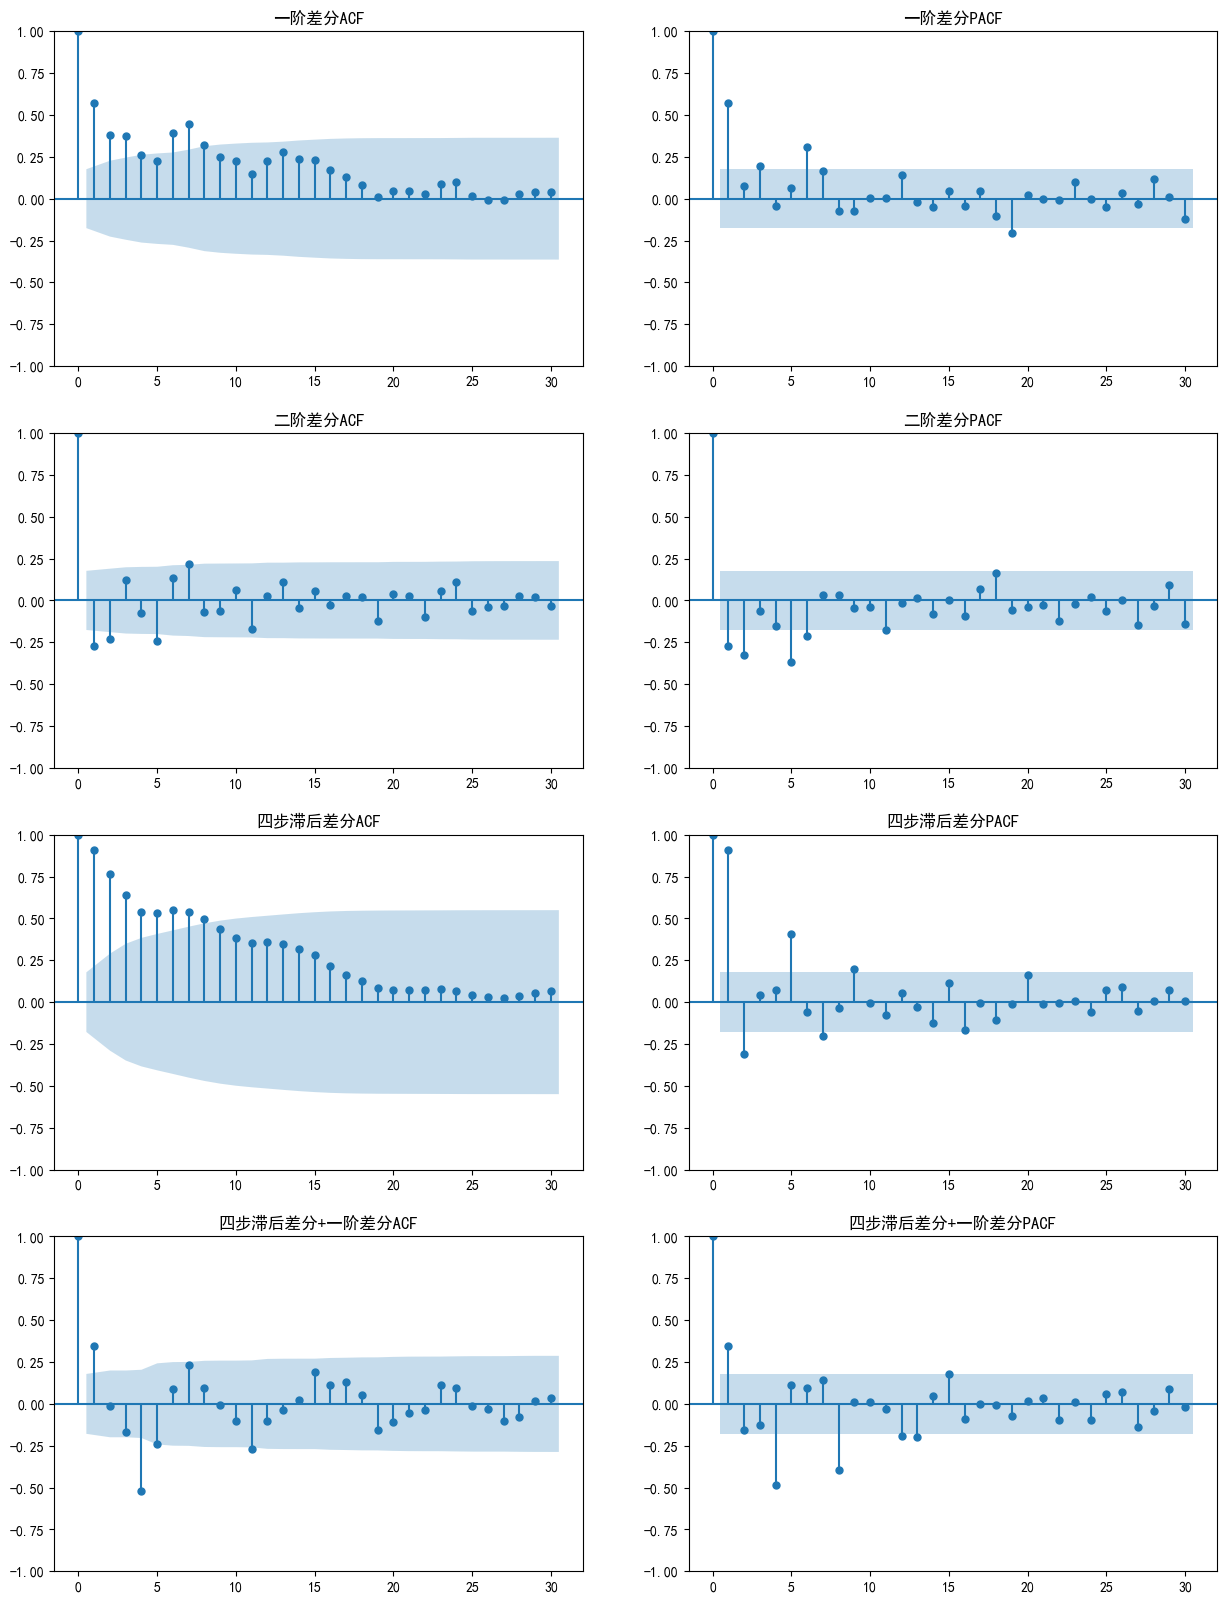

In [ ]:
df_quar_d = df_quar.diff().dropna()
df_quar_dd = df_quar_d.diff().dropna()
df_quar_p4 = df_quar.diff(4).dropna()
df_quar_p4d = df_quar_p4.diff().dropna()
dfds = [df_quar_d, df_quar_dd, df_quar_p4, df_quar_p4d]
# 画出四种差分后的自相关和偏自相关图
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
for i, ax in enumerate(axes.flat):
    if i % 2 == 0:
        plot_acf(dfds[i // 2].iloc[:, 1], ax=ax, lags=30)
    else:
        plot_pacf(dfds[i // 2].iloc[:, 1], ax=ax, lags=30)
    ax.set_title(['一阶差分', '二阶差分', '四步滞后差分', '四步滞后差分+一阶差分'][i // 2] + ['ACF', 'PACF'][i % 2])
plt.tight_layout
plt.show()

c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order: [2, 1, 2], Durbin-Watson Statistic: 1.248
Order: [1, 2, 1], Durbin-Watson Statistic: 2.123


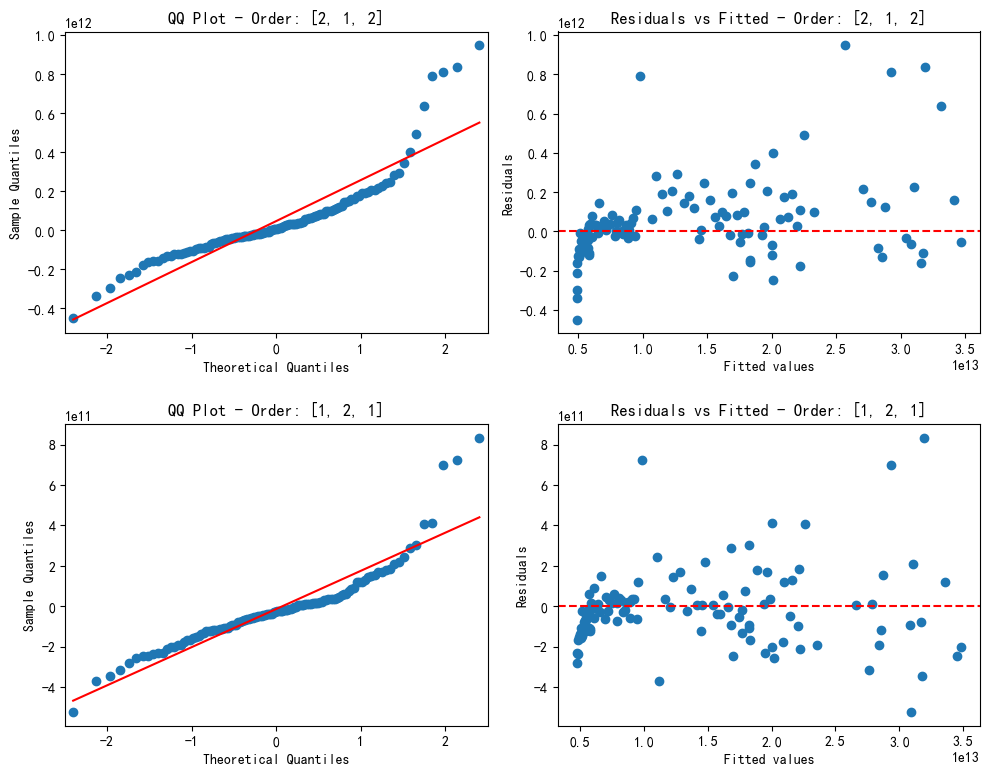

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for index, i in enumerate([[2,1,2],[1,2,1]]):
    model = ARIMA(ts, order=(i))
    model_fit = model.fit()
    # 计算残差
    residuals = model_fit.resid.iloc[2:]
    residuals = residuals.drop(pd.Timestamp('2020-06-30'))
    
    # 残差的正态性检验 - QQ图
    qqplot(residuals, line='s', ax=axs[index, 0])
    axs[index, 0].set_title('QQ Plot - Order: {}'.format(i))
    
    # 残差的独立性检验 - Durbin-Watson统计量
    dw_stat = durbin_watson(residuals)
    print('Order: {}, Durbin-Watson Statistic: {:.3f}'.format(i, dw_stat))
    
    # 残差的同方差性检验（可视化方法）- 散点图
    fitted_values = model_fit.fittedvalues.iloc[2:].drop(pd.Timestamp('2020-06-30'))
    axs[index, 1].scatter(fitted_values, residuals)
    axs[index, 1].axhline(y=0, color='r', linestyle='--')
    axs[index, 1].set_xlabel('Fitted values')
    axs[index, 1].set_ylabel('Residuals')
    axs[index, 1].set_title('Residuals vs Fitted - Order: {}'.format(i))

plt.tight_layout()
plt.show()

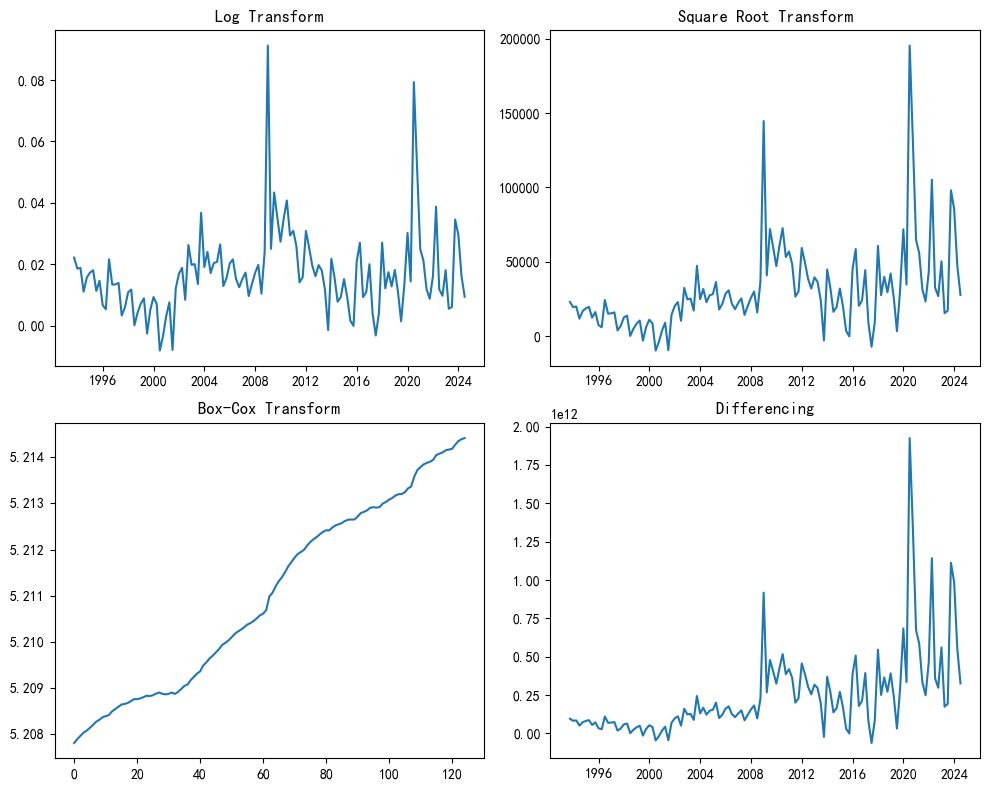

In [ ]:


# 假设ts是Pandas Series类型的时间序列数据
# 差分
ts_diff = ts.diff().dropna()

# 对数变换
ts_log = np.log(ts).diff().dropna()

# 平方根变换
ts_sqrt = np.sqrt(ts).diff().dropna()

# Box-Cox变换
ts_boxcox, lambda_ = boxcox(ts)
# ts_boxcox = pd.Series(ts_boxcox, index=ts.index).diff().dropna()

# 可视化变换后的数据
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(ts_log)
axs[0, 0].set_title('Log Transform')
axs[0, 1].plot(ts_sqrt)
axs[0, 1].set_title('Square Root Transform')
axs[1, 0].plot(ts_boxcox)
axs[1, 0].set_title('Box-Cox Transform')
axs[1, 1].plot(ts_diff)
axs[1, 1].set_title('Differencing')

plt.tight_layout()
plt.show()

c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


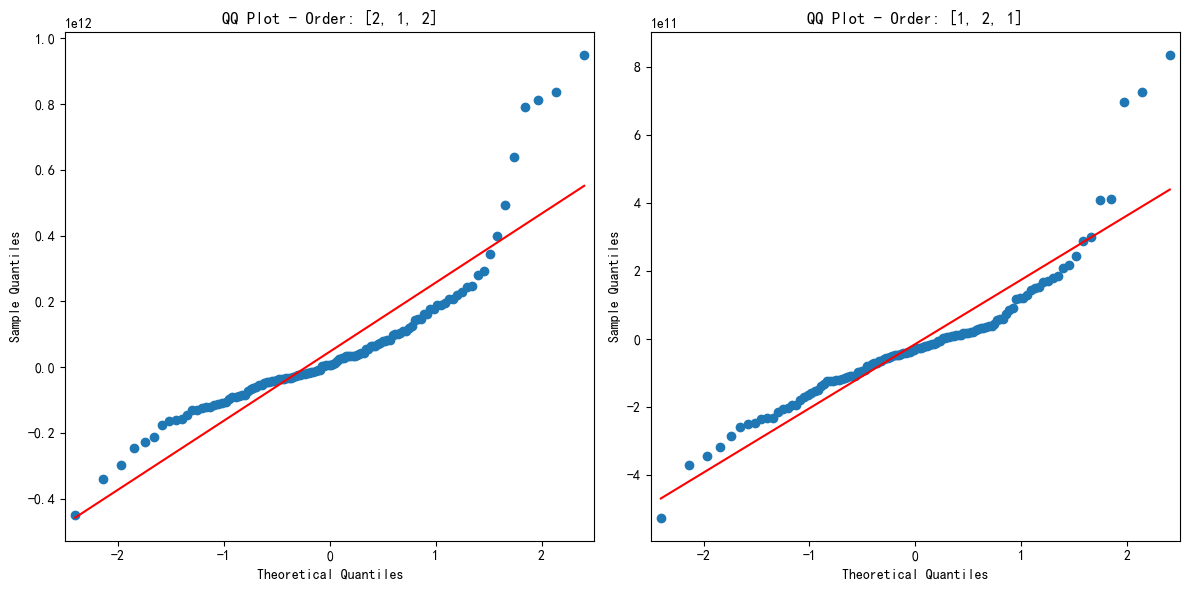

c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


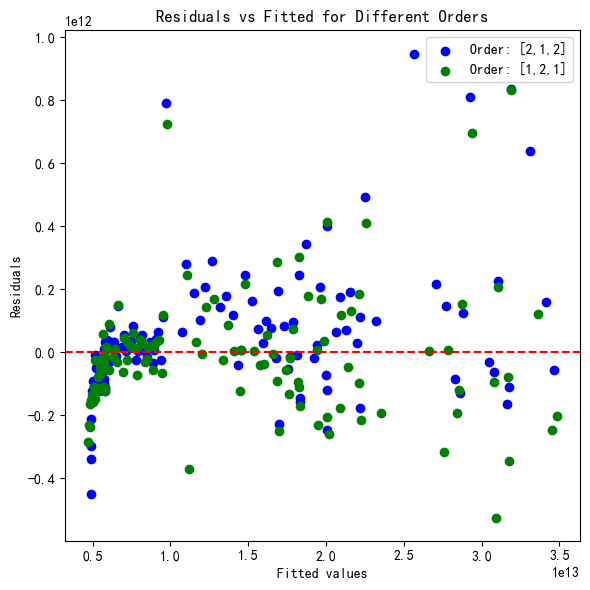

In [ ]:
# 绘制QQ图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for index, i in enumerate([[2,1,2],[1,2,1]]):
    model = ARIMA(ts, order=(i))
    model_fit = model.fit()
    # 计算残差
    residuals = model_fit.resid.iloc[2:]
    residuals = residuals.drop(pd.Timestamp('2020-06-30'))
    
    # QQ图
    qqplot(residuals, line='s', ax=axs[index])
    axs[index].set_title('QQ Plot - Order: {}'.format(i))

plt.tight_layout()
plt.show()

# 绘制散点图
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['blue', 'green']
labels = ['Order: [2,1,2]', 'Order: [1,2,1]']
scatter_data = []

for index, i in enumerate([[2,1,2],[1,2,1]]):
    model = ARIMA(ts, order=(i))
    model_fit = model.fit()
    # 计算残差
    residuals = model_fit.resid.iloc[2:]
    residuals = residuals.drop(pd.Timestamp('2020-06-30'))
    fitted_values = model_fit.fittedvalues.iloc[2:].drop(pd.Timestamp('2020-06-30'))
    scatter_data.append((fitted_values, residuals))

for data, color, label in zip(scatter_data, colors, labels):
    ax.scatter(data[0], data[1], color=color, label=label)

ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted for Different Orders')
ax.legend()

plt.tight_layout()
plt.show()

c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Timothy\Desktop\python\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\U

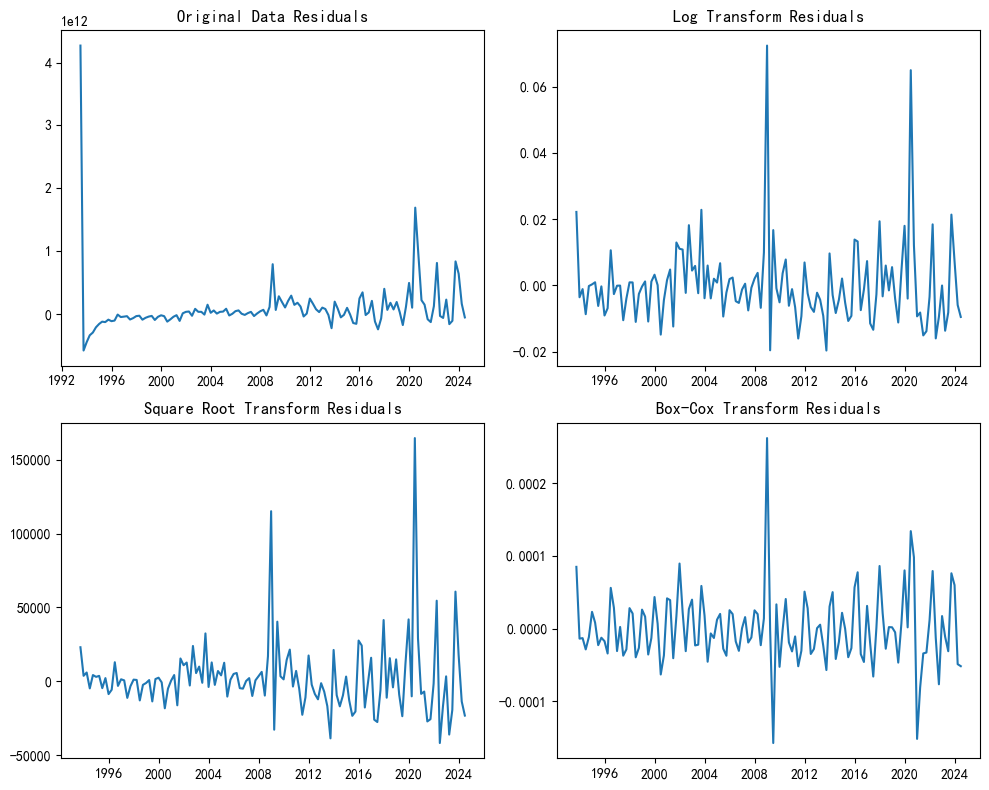

In [ ]:
# 训练ARIMA模型并绘制残差图
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 原始数据
model_ts = ARIMA(ts, order=(2, 1, 2))
model_ts_fit = model_ts.fit()
residuals_ts = model_ts_fit.resid
axs[0, 0].plot(residuals_ts)
axs[0, 0].set_title('Original Data Residuals')

# 对数变换数据
model_ts_log = ARIMA(ts_log, order=(2, 1, 2))
model_ts_log_fit = model_ts_log.fit()
residuals_ts_log = model_ts_log_fit.resid
axs[0, 1].plot(residuals_ts_log)
axs[0, 1].set_title('Log Transform Residuals')

# 平方根变换数据
model_ts_sqrt = ARIMA(ts_sqrt, order=(2, 1, 2))
model_ts_sqrt_fit = model_ts_sqrt.fit()
residuals_ts_sqrt = model_ts_sqrt_fit.resid
axs[1, 0].plot(residuals_ts_sqrt)
axs[1, 0].set_title('Square Root Transform Residuals')

# Box-Cox变换数据
model_ts_boxcox = ARIMA(ts_boxcox, order=(2, 1, 2))
model_ts_boxcox_fit = model_ts_boxcox.fit()
residuals_ts_boxcox = model_ts_boxcox_fit.resid
axs[1, 1].plot(residuals_ts_boxcox)
axs[1, 1].set_title('Box-Cox Transform Residuals')

plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

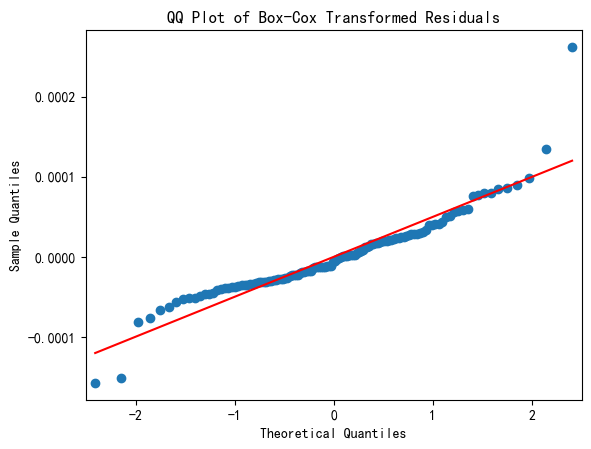

Durbin-Watson Statistic: 1.846956086608636


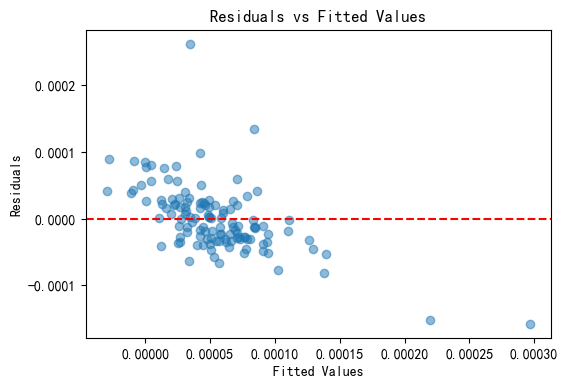

In [ ]:
# 绘制Box-Cox变换后的残差的QQ图
plt.figure(figsize=(6, 4))
qqplot(residuals_ts_boxcox, line='s')
plt.title('QQ Plot of Box-Cox Transformed Residuals')
plt.show()

# 计算Durbin-Watson统计量
dw_statistic = durbin_watson(residuals_ts_boxcox)
print(f'Durbin-Watson Statistic: {dw_statistic}')

# 同方差性检验 - 散点图（残差与拟合值的散点图）
fitted_values = model_ts_boxcox_fit.predict()
plt.figure(figsize=(6, 4))
plt.scatter(fitted_values, residuals_ts_boxcox, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

2024-09-30    3.499574e+13
2024-12-31    3.541348e+13
2025-03-31    3.585144e+13
2025-06-30    3.630138e+13
2025-09-30    3.675839e+13
2025-12-31    3.721959e+13
Freq: QE-DEC, Name: predicted_mean, dtype: float64


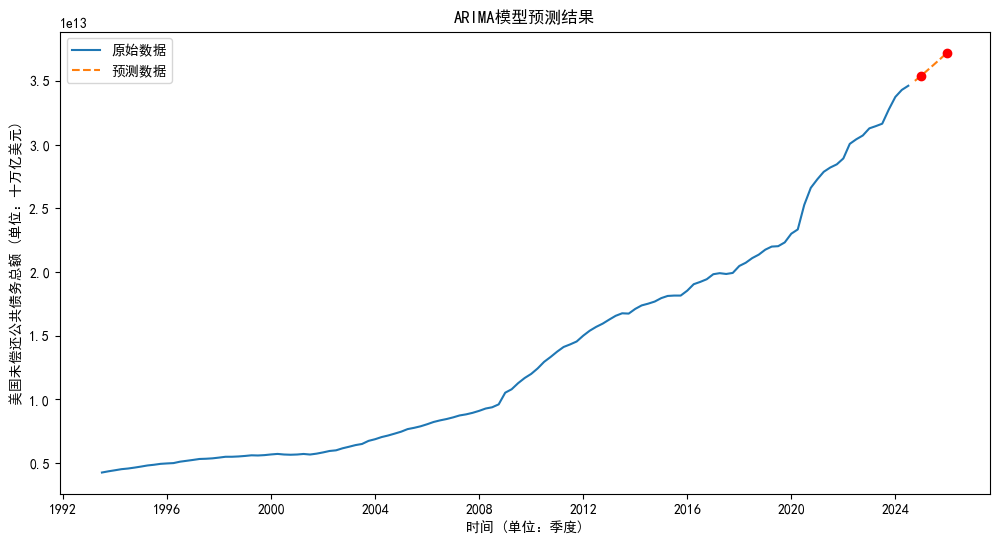

In [ ]:
# 使用选定的p, d, q拟合ARIMA模型
model = ARIMA(ts, order=(1, 2, 1))
model_fit = model.fit()
n_periods = 6
forecast = model_fit.forecast(steps=n_periods)
print(forecast)
# 绘制原始数据和预测数据
plt.figure(figsize=(12, 6))
plt.plot(ts, label='原始数据')
plt.plot(forecast, label='预测数据', linestyle='--')
plt.scatter(pd.to_datetime('2024-12-31'), forecast.loc['2024-12-31'], color='red', zorder=5)
plt.scatter(pd.to_datetime('2025-12-31'), forecast.loc['2025-12-31'], color='red', zorder=5)
plt.title('ARIMA模型预测结果')
plt.xlabel('时间 (单位：季度)')
plt.ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
plt.legend()
plt.show()

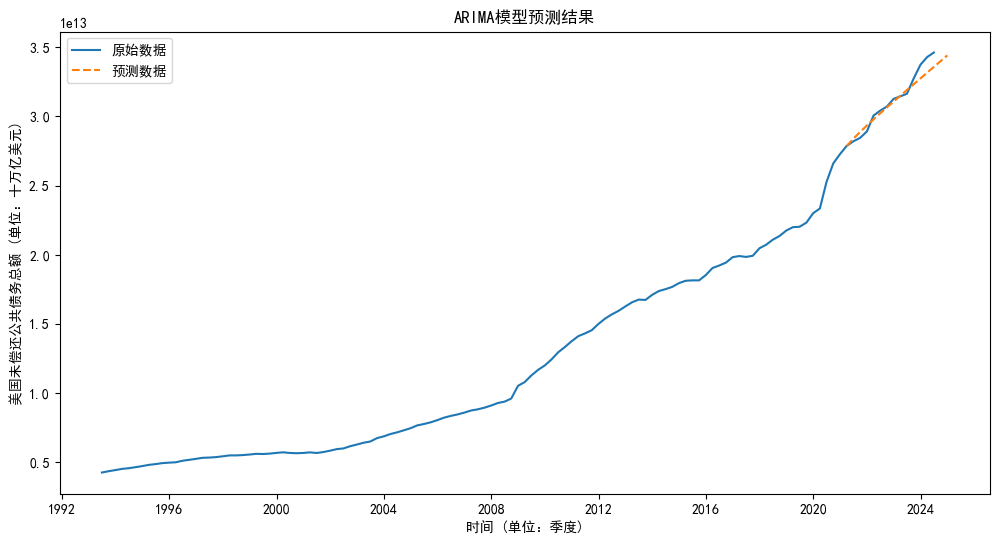

In [ ]:
tt = df_quar.loc[:pd.to_datetime('2020-12-31')].iloc[:, 1]
model = ARIMA(tt, order=(1, 2, 1))
model_fit = model.fit()
n_periods = 16
forecast = model_fit.forecast(steps=n_periods)
# print(forecast)
# 绘制原始数据和预测数据
plt.figure(figsize=(12, 6))
plt.plot(ts, label='原始数据')
plt.plot(forecast, label='预测数据', linestyle='--')
# plt.scatter(pd.to_datetime('2024-12-31'), forecast.loc['2024-12-31'], color='red', zorder=5)
# plt.scatter(pd.to_datetime('2025-12-31'), forecast.loc['2025-12-31'], color='red', zorder=5)
plt.title('ARIMA模型预测结果')
plt.xlabel('时间 (单位：季度)')
plt.ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
plt.legend()
plt.show()

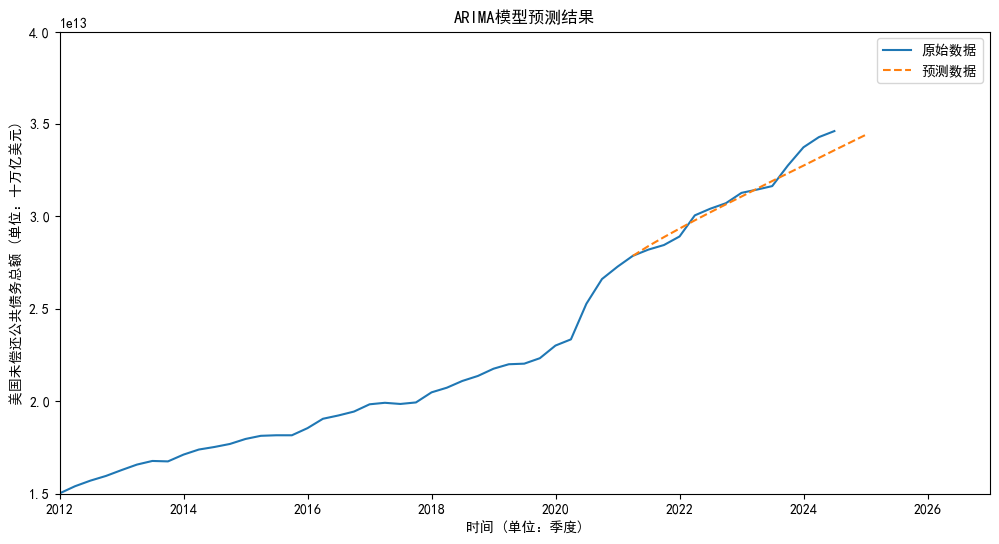

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='原始数据')
plt.plot(forecast, label='预测数据', linestyle='--')
plt.title('ARIMA模型预测结果')
plt.xlabel('时间 (单位：季度)')
plt.ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
plt.xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2027-01-01'))
plt.ylim(1.5e13, 4.0e13)
plt.legend()
plt.show()

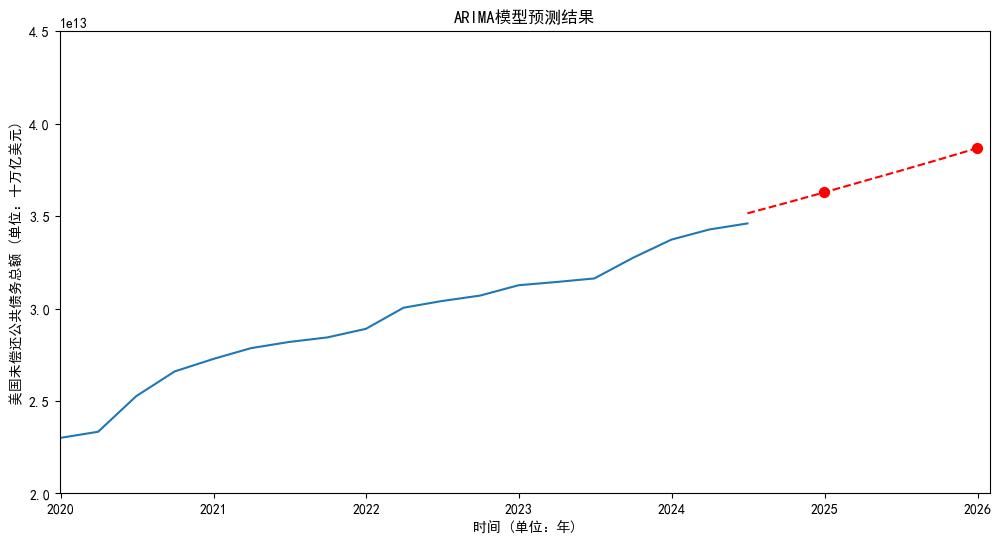

In [ ]:
# 绘制原始数据
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Data')
# 绘制预测结果
plt.plot(pd.to_datetime(result_df['Date']), result_df['Forecast'], label='Forecast', linestyle='--', color='red')
# 特定日期
dates_to_highlight = ['2024-12-30', '2025-12-30']

# 在原始数据和预测结果中查找这些日期的值
for date in dates_to_highlight:
    # 转换日期字符串为pandas的日期时间格式
    date_pd = pd.to_datetime(date)
    # 检查这个日期是否在预测结果中
    if date_pd in pd.to_datetime(result_df['Date']).values:
        forecast_value = result_df.loc[pd.to_datetime(result_df['Date']) == date_pd, 'Forecast'].values[0]
        plt.scatter(date_pd, forecast_value, color='red', s=50)
# 显示图表
plt.title('ARIMA模型预测结果')
plt.xlabel('时间 (单位：年)')
plt.ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
plt.xlim(pd.to_datetime('2019-12-30'), pd.to_datetime('2026-1-30'))
plt.ylim(2.0e13, 4.5e13)
plt.show()


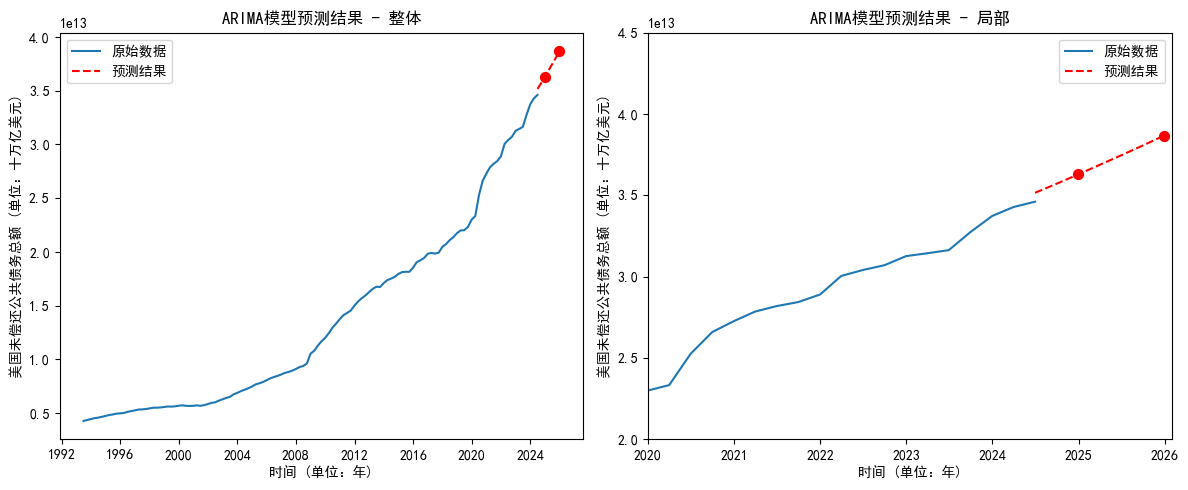

In [ ]:
# 创建一个图形和两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图：绘制整体预测结果
ax1.plot(ts, label='原始数据')
ax1.plot(pd.to_datetime(result_df['Date']), result_df['Forecast'], label='预测结果', linestyle='--', color='red')
ax1.set_title('ARIMA模型预测结果 - 整体')
ax1.set_xlabel('时间 (单位：年)')
ax1.set_ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
ax1.legend()
# 在原始数据和预测结果中查找这些日期的值
for date in dates_to_highlight:
    # 转换日期字符串为pandas的日期时间格式
    date_pd = pd.to_datetime(date)
    # 检查这个日期是否在预测结果中
    if date_pd in pd.to_datetime(result_df['Date']).values:
        forecast_value = result_df.loc[pd.to_datetime(result_df['Date']) == date_pd, 'Forecast'].values[0]
        ax1.scatter(date_pd, forecast_value, color='red', s=50)

# 第二个子图：绘制局部预测结果
ax2.plot(ts, label='原始数据')
ax2.plot(pd.to_datetime(result_df['Date']), result_df['Forecast'], label='预测结果', linestyle='--', color='red')
# 设置局部图的时间范围
ax2.set_xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2026-01-30'))
ax2.set_ylim(2.0e13, 4.5e13)
ax2.set_title('ARIMA模型预测结果 - 局部')
ax2.set_xlabel('时间 (单位：年)')
ax2.set_ylabel('美国未偿还公共债务总额 (单位：十万亿美元)')
ax2.legend()
# 在原始数据和预测结果中查找这些日期的值
for date in dates_to_highlight:
    # 转换日期字符串为pandas的日期时间格式
    date_pd = pd.to_datetime(date)
    # 检查这个日期是否在预测结果中
    if date_pd in pd.to_datetime(result_df['Date']).values:
        forecast_value = result_df.loc[pd.to_datetime(result_df['Date']) == date_pd, 'Forecast'].values[0]
        ax2.scatter(date_pd, forecast_value, color='red', s=50)

# 调整子图间距
plt.tight_layout()

plt.show()

In [ ]:
# 步骤1: 将预测值转换为DataFrame
forecasted_df = pd.DataFrame(forecasted_values_original, columns=train.columns)
# 步骤2: 创建新的时间索引
last_date = train.index[-1]
new_dates = pd.date_range(start=last_date, periods=8, freq='Q')[1:]  # 创建7个季度的新日期，从最后一个日期之后开始
# 将新的时间索引赋值给预测的DataFrame
forecasted_df.index = new_dates
# 步骤3: 合并原始数据和预测数据
train_forecasted = pd.concat([train, forecasted_df])
print(train_forecasted.tail(10))  # 打印合并后的新数据集的最后10行，以检查追加的预测数据

                 社会消费品零售            出口            进口          财政支出  \
2023-09-30  6.231764e+06  3.030751e+06  3.809982e+06  4.794830e+06   
2023-12-31  6.255650e+06  3.051660e+06  3.835394e+06  4.871828e+06   
2024-03-31  6.211704e+06  3.084793e+06  3.919689e+06  4.940989e+06   
2024-06-30  6.193499e+06  3.067389e+06  3.887121e+06  5.041123e+06   
2024-09-30  6.187575e+06  3.037683e+06  3.876337e+06  5.114178e+06   
2024-12-31  6.197040e+06  3.086727e+06  3.881909e+06  5.194389e+06   
2025-03-31  6.166276e+06  3.092871e+06  3.855085e+06  5.278347e+06   
2025-06-30  6.158270e+06  3.054031e+06  3.829631e+06  5.364564e+06   
2025-09-30  6.157852e+06  3.070483e+06  3.836707e+06  5.450684e+06   
2025-12-31  6.146321e+06  3.082686e+06  3.852814e+06  5.525726e+06   

                     GDP  
2023-09-30  2.761013e+07  
2023-12-31  2.795700e+07  
2024-03-31  2.826917e+07  
2024-06-30  2.831839e+07  
2024-09-30  2.860534e+07  
2024-12-31  2.902069e+07  
2025-03-31  2.929363e+07  
2025-06-30  2

C:\Users\Timothy\AppData\Local\Temp\ipykernel_9712\2984408910.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  new_dates = pd.date_range(start=last_date, periods=8, freq='Q')[1:]  # 创建7个季度的新日期，从最后一个日期之后开始


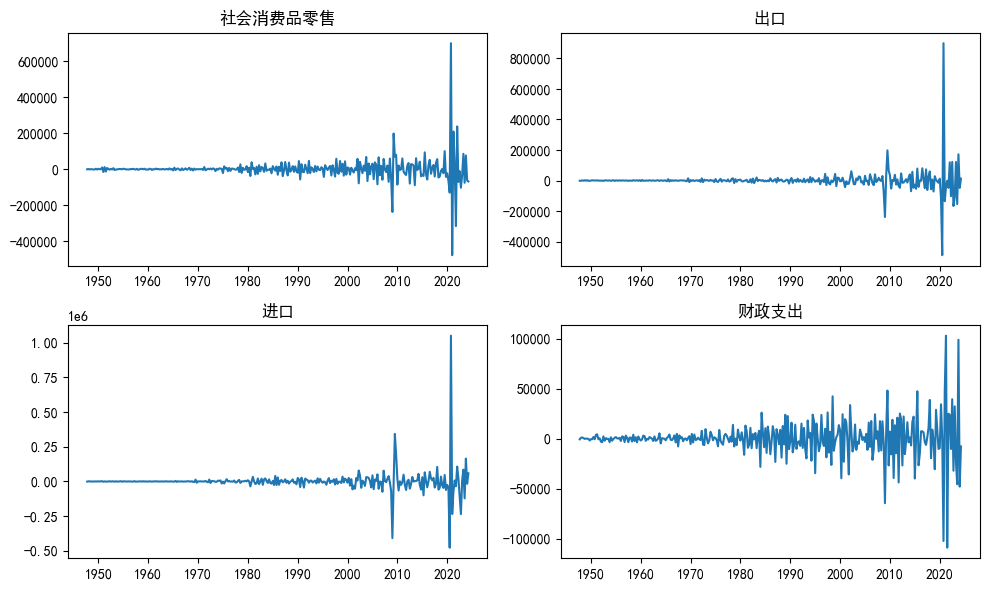

In [ ]:
train_diff = train.diff().dropna()
train_diff_diff = train_diff.diff().dropna()
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = train_diff_diff[train_diff_diff.columns[i]]
    ax.plot(data)
    ax.set_title(train_diff_diff.columns[i])
plt.tight_layout()
plt.show()